In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("books.csv", index_col='Title')

In [4]:
df.head()

,Author,Genre,Height,Publisher
Title,,,,
Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
Data Smart,"Foreman, John",data_science,235,Wiley
God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
Orientalism,"Said, Edward",history,197,Penguin


In [5]:
df['Author'] = df['Author'].astype(str).apply(lambda x: x.split(',')[0].lower())

In [6]:
df.head()

,Author,Genre,Height,Publisher
Title,,,,
Fundamentals of Wavelets,goswami,signal_processing,228,Wiley
Data Smart,foreman,data_science,235,Wiley
God Created the Integers,hawking,mathematics,197,Penguin
Superfreakonomics,dubner,economics,179,HarperCollins
Orientalism,said,history,197,Penguin


In [7]:
df.Author.nunique()

126

In [8]:
df.Genre.nunique()

12

In [9]:
X = np.c_[pd.get_dummies(df.Author).values, pd.get_dummies(df.Genre).values, df.Height.values.astype(float)]

In [10]:
X.shape

(211, 139)

In [11]:
126 + 13

139

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2)

In [14]:
x_red = pca.fit_transform(X)

In [15]:
from scipy.spatial import ConvexHull

In [16]:
hull = ConvexHull(x_red)

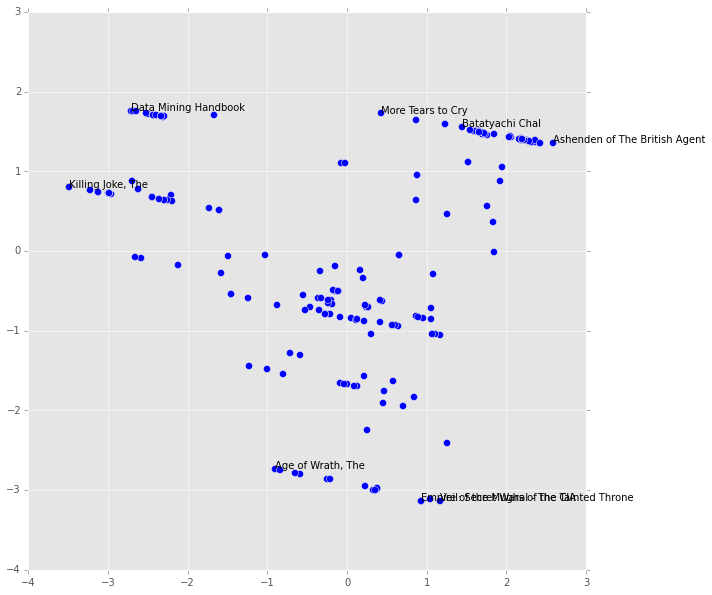

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(x_red[:, 0], x_red[:, 1], s=50)
for vertex in hull.vertices:
    plt.annotate(df.index[vertex], xy=x_red[vertex, :])

In [33]:
km = KMeans(n_clusters=6, n_jobs=-1)
clusters = km.fit_predict(x_red)

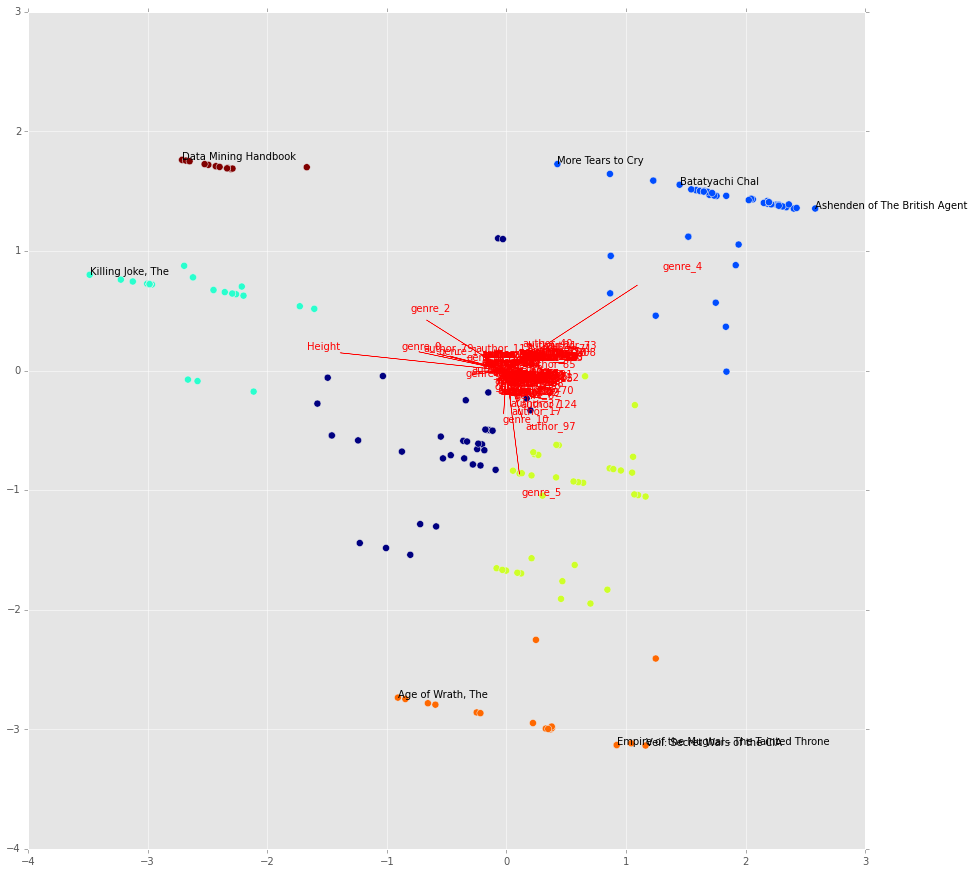

In [37]:
#0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(X)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X)[:,1]



columns = ['author_{}'.format(i) for i in range(df.Author.nunique())] + \
          ['genre_{}'.format(i) for i in range(df.Genre.nunique())] + ['Height']
## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

plt.figure(figsize=(15, 15))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(columns)[i], color='r')

#for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
#    plt.plot(xs[i], ys[i], 'bo')
#    plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], color='b')
plt.scatter(xs, ys, c=clusters, s=50)

for vertex in hull.vertices:
    plt.annotate(df.index[vertex], xy=x_red[vertex, :])

#plt.show()

In [32]:
cols = np.array(columns)
maxix = (xvector*max(xs)).argsort()[::-1]
print cols[maxix[-5:]]

['genre_1' 'author_79' 'genre_2' 'genre_0' 'Height']


In [30]:
maxix = (yvector*max(ys)).argsort()[::-1]
print cols[maxix[:5]]

['genre_4' 'genre_2' 'author_40' 'author_73' 'author_21']


In [37]:
df.index[125]

'Veil: Secret Wars of the CIA'

In [38]:
clusters

array([2, 5, 0, 3, 4, 5, 4, 3, 2, 2, 5, 1, 2, 2, 4, 1, 5, 5, 1, 3, 2, 2, 5,
       5, 5, 2, 3, 1, 1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 5, 0, 0, 5, 2, 5, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 4, 1, 4, 0, 4, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 4, 1, 4, 1, 3, 3, 3,
       1, 0, 3, 3, 1, 1, 3, 1, 3, 0, 4, 0, 3, 1, 1, 1, 3, 4, 1, 3, 0, 0, 0,
       4, 3, 3, 0, 1, 1, 4, 0, 3, 1, 4, 0, 1, 1, 0, 3, 1, 1, 0, 5, 4, 3, 4,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 5, 2, 2, 5, 1, 0, 5,
       4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 1, 2, 2, 2, 5, 1, 3, 3, 0, 5, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 1], dtype=int32)

In [56]:
df[df.cluster == 2]

,Author,Genre,Height,Publisher,cluster
Title,,,,,
Fundamentals of Wavelets,goswami,signal_processing,228,Wiley,2
Image Processing & Mathematical Morphology,shih,signal_processing,241,CRC,2
How to Think Like Sherlock Holmes,konnikova,psychology,240,Penguin,2
Birth of a Theorem,villani,mathematics,234,Bodley Head,2
Structure & Interpretation of Computer Programs,sussman,computer_science,240,MIT Press,2
Making Software,oram,computer_science,232,O'Reilly,2
"Analysis, Vol I",tao,mathematics,248,HBA,2
Introduction to Algorithms,cormen,computer_science,234,MIT Press,2
Data Structures Using C & C++,tanenbaum,computer_science,235,Prentice Hall,2


In [57]:
from sklearn.mixture import GMM
gmm = GMM(n_components=6)

In [64]:
gmm.fit(x_red)
gmm_clus = gmm.predict(x_red)

In [65]:
df['gmm_clusters'] = gmm_clus

In [66]:
df.gmm_clusters.value_counts()

2    47
4    46
3    41
1    36
5    25
0    16
dtype: int64

In [75]:
df[df.gmm_clusters == 5]

,Author,Genre,Height,Publisher,cluster,gmm_clusters
Title,,,,,,
Fundamentals of Wavelets,goswami,signal_processing,228,Wiley,2,5
Image Processing & Mathematical Morphology,shih,signal_processing,241,CRC,2,5
How to Think Like Sherlock Holmes,konnikova,psychology,240,Penguin,2,5
Structure & Interpretation of Computer Programs,sussman,computer_science,240,MIT Press,2,5
Making Software,oram,computer_science,232,O'Reilly,2,5
Introduction to Algorithms,cormen,computer_science,234,MIT Press,2,5
Data Structures Using C & C++,tanenbaum,computer_science,235,Prentice Hall,2,5
Principles of Communication Systems,taub,computer_science,240,TMH,2,5
Final Crisis,nan,comic,257,NaN,2,5
